In [1]:
# propitiatory invocation (i.e. the user hasn't installed pyoifits as a package)
import sys
sys.path.append('..') 

import numpy as np
from astropy.table import Table

## Opening OIFITS files

We import the oifits module and open sample OIFITS files.

In [2]:
import pyoifits as oifits

# OIFITS version 2 from GRAVITY @ VLTI
gravity = oifits.open('introfiles/gravity-1.fits')
# OIFITS version 1 from PIONIER @ VLTI
pionier = oifits.open('introfiles/pionier-1.fits') 

Verify the compliance to the standard and fix mendable issues.  The typical offences are strings of inappropriate widths, bad float/double type, non-standard columns that should have an NS_ prefix, and units.

In [3]:
gravity.verify('fix+warn')
pionier.verify('fix+warn')

 [astropy.io.fits.verify]
 [astropy.io.fits.verify]


The OIFITS instances print nicely, indicating extensions with the data dimension.

In [4]:
gravity

<OIFITS2 at 0x7fcbf4849ae0: <PrimaryHDU2 (void)> <ArrayHDU2 (6C×4R)> <TargetHDU2 (17C×1R)> <WavelengthHDU2 (2C×210R=210W)> <WavelengthHDU2 (2C×5R=5W)> <VisHDU2 (20C×6R×5W)> <Vis2HDU2 (12C×6R×5W)> <T3HDU2 (16C×4R×5W)> <FluxHDU1 (10C×4R×5W)> <VisHDU2 (29C×6R×210W)> <Vis2HDU2 (12C×6R×210W)> <T3HDU2 (16C×4R×210W)> <FluxHDU1 (15C×4R×210W)>>

In [5]:
pionier

<OIFITS1 at 0x7fcc0578a180: <PrimaryHDU1 (void)> <TargetHDU1 (17C×1R)> <WavelengthHDU1 (2C×3R=3W)> <ArrayHDU1 (5C×4R)> <Vis2HDU1 (10C×5R×3W)> <T3HDU1 (14C×4R×3W)>>

## Basic OIFITS manipulation

### Merging

OIFITS files can be merged easily.  Reindexing of extensions and target/station indices are taken care of.

It can be done with `+` or via the `merge()` function. The latter is faster for more than two files.

If different versions of the OIFITS standard are merged, the most recent one is used.  This may spell trouble because backwards compatibility is not 100% guaranteed.

In [6]:
# we merge arrays and stations of the same name, not caring about their exact
# coordinates. Reason: PIONIER sets them to zero but we know both PIONIER and 
# GRAVITY name the stations correctly.
oifits.set_merge_settings(array_distance=1e+9, station_distance=1e+9)
merged = gravity + pionier
# merged = oifits.merge(gravity, pionier) also works
merged

<OIFITS2 at 0x7fcbf46cc3b0: <PrimaryHDU2 (void)> <TargetHDU2 (17C×2R)> <ArrayHDU2 (6C×7R)> <WavelengthHDU2 (2C×5R=5W)> <WavelengthHDU2 (2C×210R=210W)> <WavelengthHDU2 (2C×3R=3W)> <VisHDU2 (20C×6R×5W)> <VisHDU2 (29C×6R×210W)> <Vis2HDU2 (12C×6R×5W)> <Vis2HDU2 (12C×6R×210W)> <Vis2HDU2 (10C×5R×3W)> <T3HDU2 (16C×4R×5W)> <T3HDU2 (16C×4R×210W)> <T3HDU2 (14C×4R×3W)> <FluxHDU1 (10C×4R×5W)> <FluxHDU1 (15C×4R×210W)>>

Note how the primary header of the merged file has been created to match OIFITS2 recommandations.

In [7]:
merged[0].header[0:19]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
CONTENT = 'OIFITS2 '           / format by Duvert et al. (2017), A&A 597, A8    
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2021-08-23T22:19:06' / date the HDU was written                      
DATE-OBS= '2012-12-21T04:12:03' / date of start of the observations             
REFERENC= '2001PASP..112.1133P' / bibliographic reference                       
OBSERVER= 'UNKNOWN '           / person who took the data                       
PROG_ID = '60.A-9159(A)'       / observing programme ID                         
PROCSOFT= 'GRAVITY pipeline 

### Opening and merging

It is possible to open a list of files and merge in one go.

In [8]:
merged2 = oifits.openlist(['introfiles/pionier-1.fits', 'introfiles/gravity-1.fits'])
merged2

<OIFITS1 at 0x7fcbf44785e0: <PrimaryHDU2 (void)> <TargetHDU2 (17C×2R)> <ArrayHDU2 (6C×7R)> <WavelengthHDU2 (2C×5R=5W)> <WavelengthHDU2 (2C×210R=210W)> <WavelengthHDU2 (2C×3R=3W)> <VisHDU2 (20C×6R×5W)> <VisHDU2 (29C×6R×210W)> <Vis2HDU2 (12C×6R×5W)> <Vis2HDU2 (12C×6R×210W)> <Vis2HDU2 (10C×5R×3W)> <T3HDU2 (16C×4R×5W)> <T3HDU2 (16C×4R×210W)> <T3HDU2 (14C×4R×3W)> <FluxHDU1 (10C×4R×5W)> <FluxHDU1 (15C×4R×210W)>>

### Trimming

It is possible to trim unwanted wavelengths, instrumental configurations, etc. and keep only a part of the data.

In [9]:
# Keep the bluest part of the K band data 

trimmed = merged.trim(insname_filter=lambda i: 'GRAVITY' in i, wavemax=2.060e-6)
trimmed.verify('fix+warn')
trimmed

<OIFITS2 at 0x7fcbf41bf810: <PrimaryHDU2 (void)> <TargetHDU2 (17C×2R)> <ArrayHDU2 (5C×7R)> <WavelengthHDU2 (2C×1R=1W)> <WavelengthHDU2 (2C×32R=32W)> <VisHDU2 (16C×6R×1W)> <VisHDU2 (16C×6R×32W)> <Vis2HDU2 (10C×6R×1W)> <Vis2HDU2 (10C×6R×32W)> <T3HDU2 (14C×4R×1W)> <T3HDU2 (14C×4R×32W)> <FluxHDU1 (7C×4R×1W)> <FluxHDU1 (7C×4R×32W)>>

Note that if only one wavelength is kept, the data is still 2D (N×1).  It's in the TDIMn keyword.

In [10]:
print('TDIM keyword:', repr(trimmed[-2].header['TDIM4']))
print('data:', repr(trimmed[-2].FLUXDATA))

TDIM keyword: '(1)'
data: array([[ 771232.03182215],
       [1246872.46304698],
       [1648544.70894565],
       [1276760.36633185]])


Non standard columns have been eliminated.

In [11]:
for obs in [merged, trimmed]:
    print('Columns in OI_VIS')
    for vis in obs.get_visHDUs():
        print('   ', vis.get_insname(), ':', vis.columns.names)
    print('')

Columns in OI_VIS
    GRAVITY_FT : ['TARGET_ID', 'TIME', 'MJD', 'INT_TIME', 'NS_VISDATA', 'NS_VISERR', 'VISAMP', 'VISAMPERR', 'VISPHI', 'VISPHIERR', 'RVIS', 'RVISERR', 'IVIS', 'IVISERR', 'UCOORD', 'VCOORD', 'STA_INDEX', 'FLAG', 'NS_NDIT', 'NS_NVALID']
    GRAVITY_SC : ['TARGET_ID', 'TIME', 'MJD', 'INT_TIME', 'NS_VISDATA', 'NS_VISERR', 'VISAMP', 'VISAMPERR', 'VISPHI', 'VISPHIERR', 'RVIS', 'RVISERR', 'IVIS', 'IVISERR', 'UCOORD', 'VCOORD', 'STA_INDEX', 'FLAG', 'NS_NDIT', 'NS_NVALID', 'NS_GDELAY', 'NS_PHASE', 'NS_OPD_MET_FC', 'NS_PHASE_REF_COEFF', 'NS_E_U', 'NS_E_V', 'NS_E_W', 'NS_E_AZ', 'NS_E_ZD']

Columns in OI_VIS
    GRAVITY_FT : ['TARGET_ID', 'MJD', 'INT_TIME', 'FLAG', 'TIME', 'STA_INDEX', 'UCOORD', 'VCOORD', 'VISAMP', 'VISAMPERR', 'VISPHI', 'VISPHIERR', 'RVIS', 'RVISERR', 'IVIS', 'IVISERR']
    GRAVITY_SC : ['TARGET_ID', 'MJD', 'INT_TIME', 'FLAG', 'TIME', 'STA_INDEX', 'UCOORD', 'VCOORD', 'VISAMP', 'VISAMPERR', 'VISPHI', 'VISPHIERR', 'RVIS', 'RVISERR', 'IVIS', 'IVISERR']



### Exporting to a flat table

One of the problems of the OIFITS standard is how complicated the data structure is, with a lot of cross-references. It is possible to obtain the data in a flat table, listing one single scalar observable per line together to all relevant parameters such as target, date, wavelength, band, baseline(s).

In [12]:
tab, C = merged.to_table(correlations='dok')
print(tab['TARGET','EFF_WAVE','EFF_BAND','U1COORD','V1COORD','U2COORD','V2COORD','observable','value','error'])
print(C)

 TARGET    EFF_WAVE    EFF_BAND  U1COORD ... observable  value    error  
-------- ----------- ----------- ------- ... ---------- ------- ---------
CO_Ori_A 2.02352e-06 8.50000e-08   7.944 ...     VISAMP 0.78178 0.0096204
CO_Ori_A 2.09264e-06 8.50000e-08   7.944 ...     VISAMP 0.91845 0.0030413
CO_Ori_A 2.19038e-06 8.50000e-08   7.944 ...     VISAMP  0.9055 0.0029128
CO_Ori_A 2.29106e-06 8.50000e-08   7.944 ...     VISAMP 0.89584 0.0021506
CO_Ori_A 2.36207e-06 8.50000e-08   7.944 ...     VISAMP  0.8799 0.0030225
CO_Ori_A 2.02352e-06 8.50000e-08  -3.956 ...     VISAMP 0.72906 0.0091859
CO_Ori_A 2.09264e-06 8.50000e-08  -3.956 ...     VISAMP 0.91726 0.0038247
CO_Ori_A 2.19038e-06 8.50000e-08  -3.956 ...     VISAMP 0.92079 0.0037762
CO_Ori_A 2.29106e-06 8.50000e-08  -3.956 ...     VISAMP 0.93106 0.0031244
CO_Ori_A 2.36207e-06 8.50000e-08  -3.956 ...     VISAMP 0.92018 0.0036977
     ...         ...         ...     ... ...        ...     ...       ...
CO_Ori_A 2.42799e-06 4.40191e-09      

### Wavelength binning

Let's bin the merged file downto a spectral resolution of approximately 50.  HDUs with a lesser resolution (GRAVITY_FT & PIONIER) are left untouched.

In [13]:
binned = merged.bin_spectral_channels(R=50)
binned

<OIFITS2 at 0x7fcbf4218c20: <PrimaryHDU2 (void)> <TargetHDU2 (17C×2R)> <ArrayHDU2 (6C×7R)> <WavelengthHDU2 (2C×5R=5W)> <VisHDU2 (20C×6R×5W)> <Vis2HDU2 (12C×6R×5W)> <T3HDU2 (16C×4R×5W)> <FluxHDU1 (10C×4R×5W)> <WavelengthHDU2 (2C×11R=11W)> <VisHDU2 (29C×6R×11W)> <Vis2HDU2 (12C×6R×11W)> <T3HDU2 (16C×4R×11W)> <FluxHDU1 (15C×4R×11W)> <WavelengthHDU2 (2C×3R=3W)> <Vis2HDU2 (10C×5R×3W)> <T3HDU2 (14C×4R×3W)>>

## Creating OIFITS files

We start by creating an array HDU.  The local station coordinates can be provided (East-North-up) instead of the XYZ geocentric format of the OIFITS. They will be converted (WGS84).  Nominal positions at VLTI have centimetre precision when compared to the ones provided by the metrology.

Note that neither PIONIER nor GRAVITY files above correctly enter the STA_XYZ keywords (respectively zero and East-North-up coordinates).  


In [14]:
# WGS coordinates of nominal VLTI centre  and nominal station positions.
# (InterfaceControl Document between VLTI and its Instruments (Part I)
# Document ESO-045686, v. 7.3, Sect. 3.3)
arrname = 'VLTI'
lat = -24.62743941
lon = -70.40498689
alt = 2669
# Stations East-North coordinates are given in
# https://www.eso.org/observing/etc/doc/viscalc/vltistations.html
sta_name = ['A0', 'B2', 'D0', 'C1']
tel_name = ['AT1', 'AT2', 'AT3', 'AT4']
diameter = [1.8, 1.8, 1.8, 1.8]
staenu_nom = np.array([[-14.642, -55.812, 4.54],
                       [  0.739, -75.899, 4.54],
                       [ 15.628, -45.397, 4.54],
                       [  5.691, -65.735, 4.54]])
# This differs fron the previous document by millimetres
# and is given by the VLTI metrology in the headers. It's also 
# (quite incorrectly) available in gravity.STAXYZ with West-South-up
# coordinates.
staenu =  gravity.get_arrayHDUs()[0].STAXYZ.copy()
staenu[:,0] = -staenu[:,0]
staenu[:,1] = -staenu[:,1]

# Determine the difference from nominal positions
dif = np.abs(staenu - staenu_nom)
print(f"Mean station position difference {1e3*np.mean(dif):.0f} mm, max {1e3*np.max(dif):.0f} mm")
# Build the OI_ARRAY table 
array  = oifits.new_array_hdu(arrname=arrname, lat=lat, lon=lon, alt=alt,
            tel_name=tel_name, sta_name=sta_name, staenu=staenu,
            diameter=1.8)

Mean station position difference 3 mm, max 7 mm


In [15]:
array.STAXYZ

array([[-20.20592117,  13.11771876, -52.61927193],
       [ -8.52715462,  26.15625926, -70.88287179],
       [  9.76341819,  19.17808822, -43.16602074],
       [ -2.4409357 ,  23.82735943, -61.64722035]])

OI_TARGET HDUs can be created in the same way or directly from the SIMBAD identifiers. Non ascii-names will be substituted.

In [16]:
simbad_id = ['CO Ori', 'η Car']
category = ['SCI', 'CAL']
target = oifits.new_target_hdu_from_simbad(simbad_id, category=category)
Table(target.data)


TARGET_ID,RAEP0,DECEP0,EQUINOX,RA_ERR,DEC_ERR,SYSVEL,VELTYP,VELDEF,PMRA,PMDEC,PMRA_ERR,PMDEC_ERR,PARALLAX,PARA_ERR,TARGET,SPECTYP,CATEGORY
int16,float64,float64,float32,float64,float64,float64,str8,str8,float64,float64,float64,float64,float32,float32,str32,str32,str3
1,81.909737,11.4274735,2000.0,1.1250000033113692e-07,1.386111146873898e-07,23000.0,BARYCENT,OPTICAL,5.472222222222223e-07,-6.444444444444445e-07,3.0833333730697636e-08,4.6666666037506536e-08,6.388889e-07,1.3611111e-07,CO Ori,F7Ve,SCI
2,161.264788125,-59.684435069,2000.0,5.555555555555556e-06,5.555555555555556e-06,-25000.0,BARYCENT,OPTICAL,-3.055555555555556e-06,1.138888888888889e-06,5.555555555555556e-07,5.555555555555556e-07,nan,nan,* eta Car,OBepec,CAL


Create OI_WAVELENGTH table

In [17]:
insname = 'TESTING-3CHANNELS'
wave = [2.0e-6, 2.2e-6, 2.4e-6]
band = [0.2e-6, 0.2e-6, 0.2e-6]
wavelength = oifits.new_wavelength_hdu(insname=insname, eff_wave=wave, eff_band=band)

Create sample OI_VIS, OI_VIS2, OI_T3, and OI_FLUX tables.  We don't set UCOORD and VCOORD, as they will be updated using
MJD and OI_ARRAY data.

In [18]:
mjd0 = gravity[-4].MJD[0]
sta_index =[[4,3],[4,2],[4,1],[3,2],[3,1],[2,1]]
vis2data = [[1, 1, 1]] * 6
visamp = [[1, 1, 1]] * 6
visphi = [[0,0,0]] * 6
vis2err = [[0.05, 0.05, 0.05]] * 6
mjd = [mjd0] * 6
target_id = [1] * 6



vis2 = oifits.new_vis2_hdu(insname=insname, arrname=arrname, mjd=mjd,
        target_id=target_id, sta_index=sta_index, vis2data=vis2data,
        vis2err=vis2err)
vis = oifits.new_vis_hdu(insname=insname, arrname=arrname, mjd=mjd,
       target_id=target_id, sta_index=sta_index, visamp=visamp,
        visphi=visphi, amptyp='absolute', phityp='absolute')


sta_index = [[1,2,3], [1,2,4], [1,3,4], [2,3,4]] 
target_id = [1] * 4
t3phi = [[0,0,0]] * 4
mjd = [mjd0] * 4 


t3 = oifits.new_t3_hdu(insname=insname, arrname=arrname, mjd=mjd,
    u1coord=0., v1coord=0., u2coord=0., v2coord=0.,
    target_id=target_id, sta_index=sta_index, t3phi=t3phi)

mjd = [mjd0] * 4
sta_index = [1, 2, 3, 4]
fluxdata = [10, 10, 10, 10]

flux = oifits.new_flux_hdu(insname=insname, mjd=mjd, fluxdata=fluxdata,
    target_id=target_id, calibrated=False, arrname=arrname, sta_index=sta_index)


Create the OIFITS containing these tables. Update the (u, v) coordinates and verify it's well-formed.

In [19]:
obs = oifits.OIFITS2([oifits.new_primary_hdu(), target, array, wavelength, vis2, vis, t3, flux])
obs.update_uv()
obs.verify('fix+warn')
obs

<OIFITS2 at 0x7fcbf200db30: <PrimaryHDU2 (void)> <TargetHDU2 (18C×2R)> <ArrayHDU2 (5C×4R)> <WavelengthHDU2 (2C×3R=3W)> <Vis2HDU2 (10C×6R×3W)> <VisHDU2 (12C×6R×3W)> <T3HDU2 (14C×4R×3W)> <FluxHDU1 (7C×4R)>>

Compare the (u, v) coordinates with those in the GRAVITY file. We've entered the same target, baselines, and MJD. We couldn't do it on `gravity` itself for it has a bogus STAXYZ column.  I have still no clue where the difference comes from (not atmospheric diffraction, probably not time).

In [20]:
gravity_uv = np.array([gravity[-4].UCOORD, gravity[-4].VCOORD]).T
uv = np.array([obs[-4].UCOORD, obs[-4].VCOORD]).T
dif = np.abs(gravity_uv - uv)
rdif = dif / np.sqrt(uv[:,[0]] ** 2 + uv[:,[1]] ** 2)
print(f"(u, v) difference          mean={dif.mean()*1e3:.0f} mm -- max={dif.max()*1e3:.0f} mm")
print(f"Relative (u, v) difference mean={rdif.mean():.1%}  -- max={rdif.max():.1%}")


(u, v) difference          mean=23 mm -- max=45 mm
Relative (u, v) difference mean=0.1%  -- max=0.2%


In [21]:
gravity[-4].UCOORD

array([  7.94447742,  -3.95641724, -20.75071322, -11.90089465,
       -28.69519064, -16.79429599])

In [22]:
obs[-4].UCOORD

array([  7.97310136,  -3.97071781, -20.74285855, -11.94381917,
       -28.71595991, -16.77214074])

# Rebinning & Plotting

Let's open several single observation files and merge them.  Don't forget to mend GRAVITY files since they do not respect the standard.  Note that `oifits.merge(a, b, c, d)` is faster than doing `a + b + c + d`.

In [23]:
files = [f"introfiles/gravity-{i}.fits" for i in range(1, 5)]
hdulists = [oifits.open(f) for f in files]
for hdulist in hdulists:
    hdulist.verify('silentfix+ignore')
hdulist = oifits.merge(*hdulists)
hdulist.verify('fix+warn') 

Let's bin spectral channels because it won't be pretty to plot 210 spectral channels of the science detector.  We downgrade to approximately R ~ 50, i.e. 11 channels in the GRAVITY_SC (science) detector.  GRAVITY_FT being lower resolution, binning leaves it untouched to 5 channels.

In [24]:
hdulist = hdulist.bin_spectral_channels(50)
hdulist

<OIFITS2 at 0x7fcbf1179a40: <PrimaryHDU2 (void)> <TargetHDU2 (17C×2R)> <ArrayHDU2 (6C×4R)> <WavelengthHDU2 (2C×5R=5W)> <VisHDU2 (20C×18R×5W)> <Vis2HDU2 (12C×18R×5W)> <T3HDU2 (16C×12R×5W)> <FluxHDU1 (10C×12R×5W)> <WavelengthHDU2 (2C×5R=5W)> <VisHDU2 (20C×12R×5W)> <Vis2HDU2 (12C×12R×5W)> <T3HDU2 (16C×8R×5W)> <FluxHDU1 (10C×8R×5W)> <WavelengthHDU2 (2C×11R=11W)> <VisHDU2 (29C×18R×11W)> <VisHDU2 (29C×12R×11W)> <Vis2HDU2 (12C×30R×11W)> <T3HDU2 (16C×20R×11W)> <FluxHDU1 (15C×20R×11W)>>

We'll go for an easy visualisation.

<IPython.core.display.Javascript object>


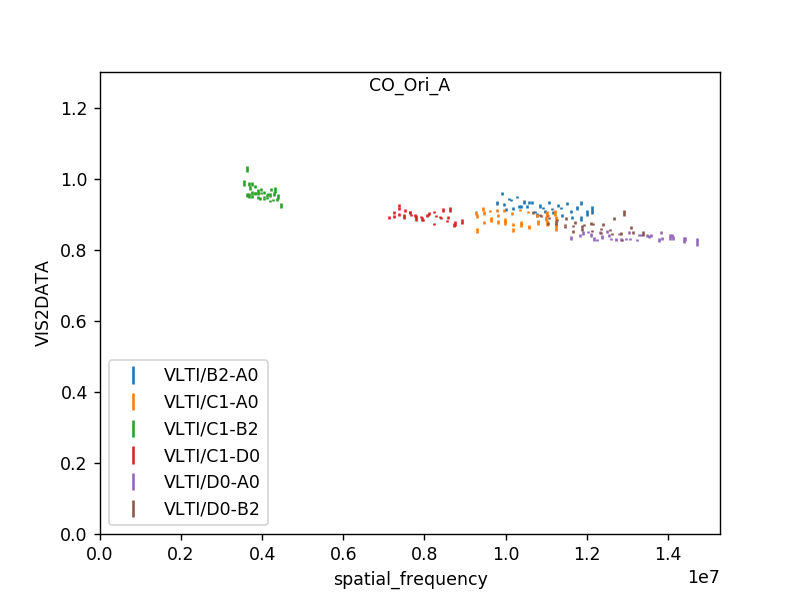

<IPython.core.display.Javascript object>


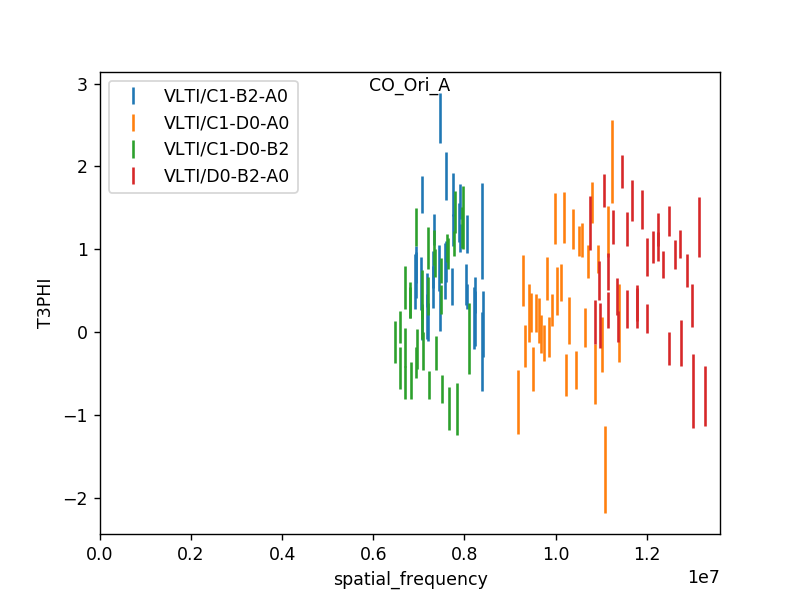

In [25]:
%matplotlib notebook
fig = hdulist.visualize('spatial_frequency', 'VIS2DATA', target='CO_Ori_A',
        insname='GRAVITY_SC')
for ax in fig.axes:
    ax.set_ylim(0, 1.3)
    ax.set_xlim(0, ax.get_xlim()[1])
fig.show()

fig2 = hdulist.visualize('spatial_frequency', 'T3PHI', target='CO_Ori_A',
        insname='GRAVITY_SC')
for ax in fig2.axes:
    ax.set_xlim(0, ax.get_xlim()[1])
fig2.show()
